<a href="https://colab.research.google.com/github/manhanton/DataInsight/blob/master/TF_Decision_forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow>=2.5

In [2]:
import tensorflow as tf 
tf.__version__

'2.5.0'

In [4]:
!pip install tensorflow_decision_forests

     |████████████████████████████████| 6.2MB 5.1MB/s 


In [5]:
import tensorflow_decision_forests as tfdf 

In [6]:
from google.colab import files
files.upload()

Saving BTC_USD_2013-10-01_2021-06-13-CoinDesk.csv to BTC_USD_2013-10-01_2021-06-13-CoinDesk.csv


{'BTC_USD_2013-10-01_2021-06-13-CoinDesk.csv': b'Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)\r\nBTC,2013-10-01,123.65499,124.30466,124.75166,122.56349\r\nBTC,2013-10-02,125.455,123.65499,125.7585,123.63383\r\nBTC,2013-10-03,108.58483,125.455,125.66566,83.32833\r\nBTC,2013-10-04,118.67466,108.58483,118.675,107.05816\r\nBTC,2013-10-05,121.33866,118.67466,121.93633,118.00566\r\nBTC,2013-10-06,120.65533,121.33866,121.85216,120.5545\r\nBTC,2013-10-07,121.795,120.65533,121.99166,120.43199\r\nBTC,2013-10-08,123.033,121.795,123.64016,121.35066\r\nBTC,2013-10-09,124.049,123.033,124.7835,122.59266\r\nBTC,2013-10-10,125.96116,124.049,128.01683,123.81966\r\nBTC,2013-10-11,125.27966,125.96116,126.43666,124.11383\r\nBTC,2013-10-12,125.9275,125.27966,126.0365,123.12966\r\nBTC,2013-10-13,126.38333,125.9275,126.8965,125.2765\r\nBTC,2013-10-14,135.24199,126.38333,135.24199,126.255\r\nBTC,2013-10-15,133.20333,135.24199,135.69216,130.39275\r\nBTC,2013-10-16,142.76333,133.

In [7]:
import pandas as pd

df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-06-13-CoinDesk.csv', parse_dates=["Date"] ,index_col=["Date"])

In [8]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2813 entries, 2013-10-01 to 2021-06-13
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2813 non-null   object 
 1   Closing Price (USD)  2813 non-null   float64
 2   24h Open (USD)       2813 non-null   float64
 3   24h High (USD)       2813 non-null   float64
 4   24h Low (USD)        2813 non-null   float64
dtypes: float64(4), object(1)
memory usage: 131.9+ KB


In [15]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


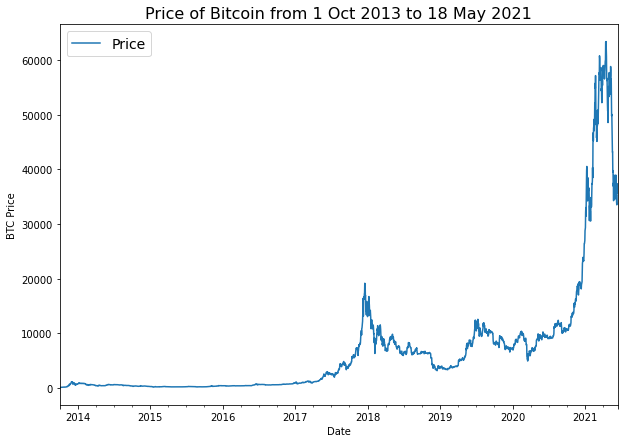

In [16]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize = 16)
plt.legend(fontsize=14);

# Part 1 : Train and Test sets for time series data

Let's turn our DataFrame index and column into NumPy arrays.

In [18]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
split_size = int(0.8*len(prices)) # 80% Train, 20% Test

# Creating training data splits(everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Creating test data splits(everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)


(2250, 563, 2250, 563)

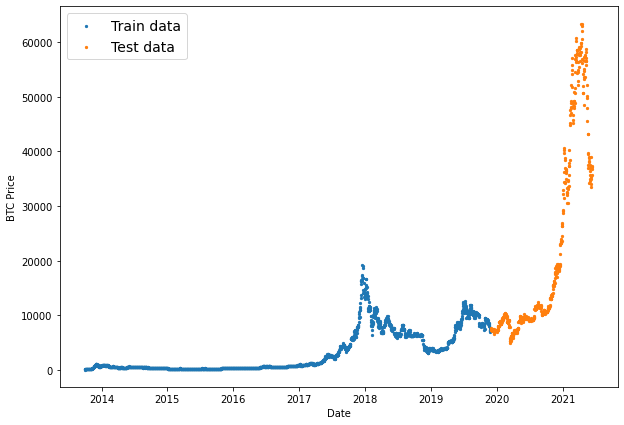

In [22]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

We're going to be using the training set (past) to train a model to try and predict values on the test set (future).

Because the test set is an artificial future, we can guage how our model might perform on actual future data.

**Create a plotting fuction**

In [23]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # PLot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

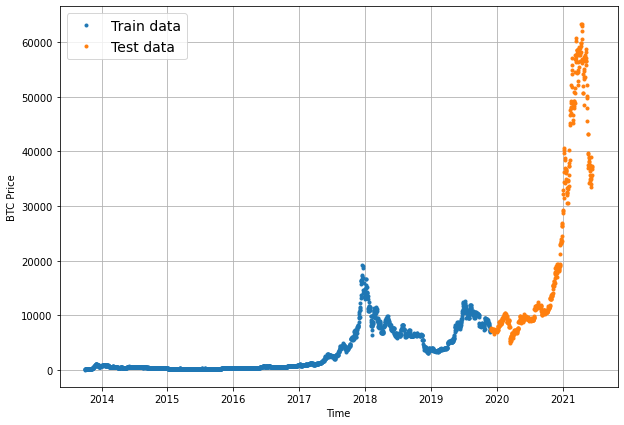

In [24]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

# Part 2 : Modelling Experiments

- **horizon** = number of timesteps to predict into future
- **window** = number of timesteps from past used to predict **horizon**

For example, if we wanted to predict the price of Bitcoin for tommorrow (1 day in the future) using the previous week's worth of Bitcoin prices (7 days in the past) the **horizon** would be 1 and the **window** would be 7



# Naive Forecast

In [25]:
naive_forecast = y_test[:-1] # Naive forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:]

(array([7390.20746923, 7729.26593894, 7542.23560864, 7381.96300782,
        7333.43293049, 7315.36776456, 7213.73376172, 7398.78704961,
        7511.88058312, 7532.12351309]),
 array([37422.57145521, 38958.49277963, 37190.10135137, 34981.3806931 ,
        35335.67919864, 34016.5653405 , 33504.25661266, 37127.18972038,
        36715.04710304, 37341.58943401]))

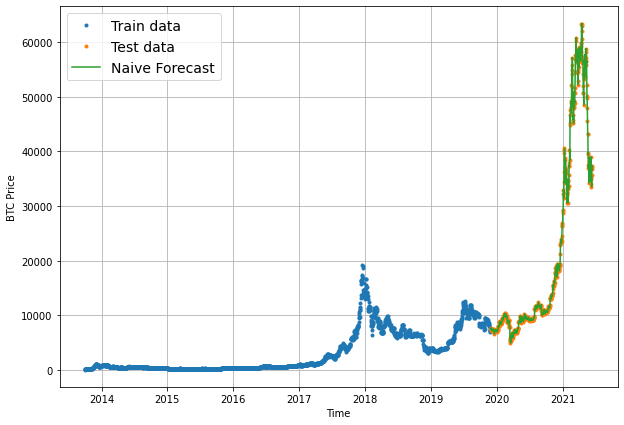

In [26]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=
                 y_train, label="Train data")
plot_time_series(timesteps=X_test, values=
                 y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=
                 naive_forecast, format="-", label="Naive Forecast");

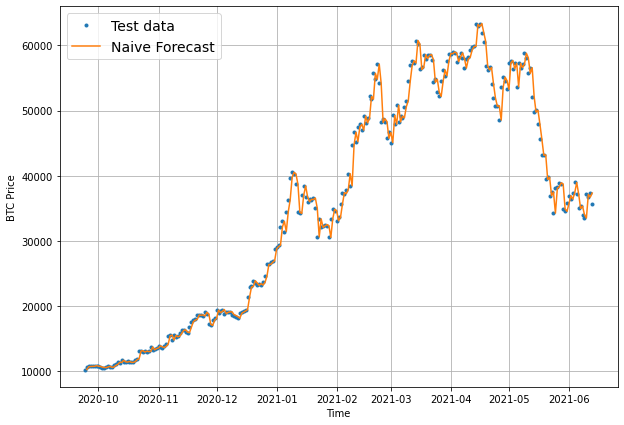

In [28]:
plt.figure(figsize=(10,7))
offset = 300  # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive Forecast");

# TensorFlow

In [29]:
HORIZON = 1
WINDOW_SIZE = 7

In [14]:
for i in range(WINDOW_SIZE):
  print(i+1)

1
2
3
4
5
6
7


In [30]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [34]:
for i in range(WINDOW_SIZE):
  bitcoin_prices[f"price+{i+1}"] = bitcoin_prices["Price"].shift(i+1)

In [36]:
bitcoin_prices.head(10)

,Price,price+1,price+2,price+3,price+4,price+5,price+6,price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [39]:
bitcoin_prices_remove_na = bitcoin_prices.dropna()
bitcoin_prices_remove_na.head(5)

,Price,price+1,price+2,price+3,price+4,price+5,price+6,price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [40]:
# Make the train/test

split_size = int(len(bitcoin_prices_remove_na) * 0.8)
train_df = bitcoin_prices_remove_na[:split_size]
test_df = bitcoin_prices_remove_na[split_size:]

In [41]:
# Target column is the Price column
label = "Price"

# Prepare datasets for TensorFlow Decision Forests
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label=label, task=tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label=label, task=tfdf.keras.Task.REGRESSION)

In [43]:
# Configure the model 
model_rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)

In [44]:
model_rf.compile(metrics=["mae"])

In [46]:
model_rf.fit(train_ds)

36/36 [==============================] - 3s 2ms/step


In [48]:
? tfdf.keras.RandomForestModel

In [49]:
model_rf.summary()

Model: "random_forest_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: REGRESSION
Label: "__LABEL"

Input Features (7):
	price+1
	price+2
	price+3
	price+4
	price+5
	price+6
	price+7

No weights

Variable Importance: NUM_NODES:
    1. "price+1" 29082.000000 ################
    2. "price+2" 16527.000000 ####
    3. "price+3" 13417.000000 ##
    4. "price+7" 12807.000000 #
    5. "price+4" 12228.000000 #
    6. "price+5" 11296.000000 
    7. "price+6" 11102.000000 

Variable Importance: NUM_AS_ROOT:
    1. "price+1" 165.000000 ################
    2. "price+2" 88.000000 ########
    3. "price+3" 41.000000 ###
    4. "price+4"  6.000000 

Variable Importance: SUM_SCORE:
    1. "price+1" 5251135863561.937500 ################
    2. "price+2" 2749932

In [57]:
model_gb.summary()

Model: "gradient_boosted_trees_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: REGRESSION
Label: "__LABEL"

Input Features (7):
	price+1
	price+2
	price+3
	price+4
	price+5
	price+6
	price+7

No weights

Variable Importance: NUM_NODES:
    1. "price+1" 798.000000 ################
    2. "price+2" 315.000000 #####
    3. "price+3" 204.000000 ###
    4. "price+4" 106.000000 #
    5. "price+5" 66.000000 
    6. "price+6" 60.000000 
    7. "price+7" 46.000000 

Variable Importance: NUM_AS_ROOT:
    1. "price+1" 37.000000 ################
    2. "price+2"  9.000000 ###
    3. "price+3"  4.000000 #
    4. "price+4"  3.000000 
    5. "price+6"  1.000000 

Variable Importance: SUM_SCORE:
    1. "price+1" 86987045553.018066 ################
    

In [51]:
# Try GB Tree

model_gb = tfdf.keras.GradientBoostedTreesModel(task=tfdf.keras.Task.REGRESSION, hyperparameter_template="benchmark_rank1")
model_gb.compile(metrics=["mae"])
model_gb.fit(train_ds)

36/36 [==============================] - 0s 1ms/step


In [52]:
model_gb.evaluate(test_ds)

9/9 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - mae: 8947.9131


[0.0, 8947.9130859375]

In [54]:
model_gb.predict(test_ds)[:10]

array([[7370.507 ],
       [7699.7236],
       [7486.624 ],
       [7247.3086],
       [7345.376 ],
       [7252.995 ],
       [7103.3525],
       [7281.4414],
       [7334.617 ],
       [7535.4736]], dtype=float32)

In [55]:
model_rf.predict(test_ds)[:10]

array([[7357.8164],
       [7788.11  ],
       [7618.0874],
       [7434.761 ],
       [7317.354 ],
       [7246.1475],
       [7227.2324],
       [7202.6494],
       [7485.516 ],
       [7566.628 ]], dtype=float32)

## Multivariate time series 

let's add another feature to our dataset

Every ~4 years, the Bitcoin block size changes so let's add that to our dataframe

In [60]:
block_reward_1 = 50 
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

In [61]:
import numpy as np
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")
bitcoin_prices_remove_na.index[:]

DatetimeIndex(['2013-10-08', '2013-10-09', '2013-10-10', '2013-10-11',
               '2013-10-12', '2013-10-13', '2013-10-14', '2013-10-15',
               '2013-10-16', '2013-10-17',
               ...
               '2021-06-04', '2021-06-05', '2021-06-06', '2021-06-07',
               '2021-06-08', '2021-06-09', '2021-06-10', '2021-06-11',
               '2021-06-12', '2021-06-13'],
              dtype='datetime64[ns]', name='Date', length=2806, freq=None)

In [62]:
block_reward_2_datetime, block_reward_3_datetime

(numpy.datetime64('2012-11-28'), numpy.datetime64('2016-07-09'))

In [ ]:
# Stop at 53.28